In [1]:
%reload_ext autoreload

In [2]:
# Packages needed

#!pip install "tabulate" "pandas_summary" "imblearn" "joblib"
#!pip install fastai==0.7.0

In [43]:
# Imports

%load_ext autoreload
%autoreload 2

%matplotlib inline
import sys
import pandas as pd
from fastai.imports import *
from fastai.structured import *
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

#import numpy as np
#import random
#from matplotlib import pyplot
#from pandas_summary import DataFrameSummary
#from IPython.display import display
#from tabulate import tabulate
#from sklearn.model_selection import GridSearchCV
#from scipy.stats.mstats import mode, gmean, hmean
#from sklearn import metrics

#set_plot_sizes(12,14,16)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
sys.path.append('../lib')
import utils
import preprocessing

In [45]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [46]:
print(len(df_raw), df_raw.shape)
df_processed = preprocessing.prepare_data(df_raw)
print(len(df_processed), df_processed.shape)

5889 (5889, 38)


../lib/preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['annual_revenue'][dataframe['annual_revenue'] == 0] = dataframe['annual_revenue'].median()
/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


5889 (5889, 93)


In [47]:
df_filtered = df_processed.loc[df_processed.licence_registration_Year >2015]

In [48]:
df_trn, y_trn, nas = proc_df(df_filtered, 'churned')
print(len(df_trn), df_trn.shape)

4401 (4401, 92)


/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
def split_vals(a,n): return a[:n], a[n:]

n_valid = 500
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [50]:
X_train.shape, y_train.shape

((3901, 92), (3901,))

In [51]:
# Fix the dataset imbalance

sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [52]:
X_train_res.shape, y_train_res.shape

((4390, 92), (4390,))

In [53]:
# Show any features with NaN values
preprocessing.features_with_nan(df_processed)

In [54]:
X_train.shape, y_train.shape

((3901, 92), (3901,))

In [55]:
utils.display_all(X_train)

,username,team,vertical,salesperson,cases_total,cases_open,cases_closed,cases_age_hours_average,interactions_total,interactions_completed,interactions_no_response,interactions_no_onboarding,interactions_completed_training,churn_concern_cases_total,churn_concern_cases_open,churn_concern_cases_avg_hours,customer_account_status_PoorStanding,plan_BASIC,plan_BRONZE,plan_BUSINESS,plan_BUSINESS +,plan_BUSINESS ONE,plan_CUSTOM,plan_CUSTOM XL,plan_ENTERPRISE,plan_GOLD,plan_GROW,plan_L&S - PREMIUM,plan_L&S - STANDARD,plan_L&S - ULTIMATE,plan_LIST N SEND SILVER,plan_LISTNSEND,plan_NETO XL,plan_PLAN-360-17Q2,plan_PLAN-360-19Q1,plan_PLAN-360-TRANSITION,plan_PLAN-360-US,plan_PLAN-L,plan_PLAN-L-17Q2,plan_PLAN-L-19Q1,plan_PLAN-L-US,plan_PLAN-M,plan_PLAN-M-17Q2,plan_PLAN-M-19Q1,plan_PLAN-M-US,plan_PLAN-S,plan_PLAN-S-17Q2,plan_PLAN-S-19Q1,plan_PLAN-S-US,plan_PLAN-XL-19Q1,plan_PLAN-XS,plan_PLAN-XS-17Q2,plan_PREMIUM,plan_STANDARD,plan_START,plan_START - LEGACY,plan_TRIAL,plan_ULTIMATE,plan_ULTIMATE PLUS,nps_detractor,nps_passive,nps_promoter,licence_registration_Year,licence_registration_Month,licence_registration_Week,licence_registration_Day,licence_registration_Dayofweek,licence_registration_Dayofyear,licence_registration_Is_month_end,licence_registration_Is_month_start,licence_registration_Is_quarter_end,licence_registration_Is_quarter_start,licence_registration_Is_year_end,licence_registration_Is_year_start,licence_registration_Elapsed,golive_Year,golive_Month,golive_Week,golive_Day,golive_Dayofweek,golive_Dayofyear,golive_Is_month_end,golive_Is_month_start,golive_Is_quarter_end,golive_Is_quarter_start,golive_Is_year_end,golive_Is_year_start,golive_Elapsed,days_active_log,golive_days_log,cases_age_hours_total_log,annual_revenue_log
1488,1367,14,7,9,5,0,0,249,1.0,1.0,0.0,0.0,0.0,1.0,0.0,398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,53,3,6,3,False,False,False,False,False,False,1451779200,2017,9,37,11,0,254,False,False,False,False,False,False,1505088000,7.221105,6.424869,7.093405,9.906421
1492,1391,14,15,8,4,1,1,249,1.0,1.0,0.0,0.0,0.0,1.0,1.0,48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,1,4,0,4,False,False,False,False,False,False,1451865600,2017,2,8,22,2,53,False,False,False,False,False,False,1487721600,7.220374,6.028279,6.396930,13.428336
1491,1377,14,3,20,5,0,0,249,2.0,2.0,0.0,0.0,0.0,1.0,0.0,398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2016,1,1,4,0,4,False,False,False,False,False,False,1451865600,2016,1,1,5,1,5,False,False,False,False,False,False,1451952000,5.313206,0.000000,7.093405,2.851284
1490,1366,14,3,11,5,0,0,249,2.0,2.0,0.0,0.0,0.0,1.0,0.0,398.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,1,4,0,4,False,False,False,False,False,False,1451865600,2016,1,3,19,1,19,False,False,False,False,False,False,1453161600,7.220374,2.708050,7.093405,9.116422
1489,1363,14,26,11,5,0,0,249,2.0,2.0,0.0,0.0,0.0,1.0,0.0,398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2016,1,1,4,0,4,False,False,False,False,False,False,1451865600,1970,1,1,1,3,1,False,True,False,True,False,True,0,4.330733,4.189655,7.093405,2.851284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,5264,7,8,13,23,2,2,249,3.0,3.0,0.0,0.0,0.0,1.0,0.0,398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018,11,45,6,1,310,False,False,False,False,False,False,1541462400,2018,12,51,21,4,355,False,False,False,False,False,False,1545350400,5.799093,3.806662,7.228388,

In [56]:
m = RandomForestClassifier(
    n_estimators=2000,
    min_samples_leaf=3, 
    max_features='sqrt',
    n_jobs=-1, 
    #oob_score=True,
    max_depth=3,
    bootstrap=False,
    criterion='entropy',
    class_weight={0: 4, 1: 1}
    )

m.fit(X_train_res, y_train_res)
#m.fit(X_train, y_train)

y_pred = m.predict(X_valid)
print(utils.uber_score(y_valid, y_pred))
utils.conf_matrix(y_valid, y_pred)

# Save to file in the current working directory
joblib_file = "churn_model.pkl"
joblib.dump(m, joblib_file)

0.45161290322580644 0.5185185185185185 0.48275862068965514 0.82 0.37442655767787136 0.18
None
tp, fn, fp, tn
[[368  51]
 [ 39  42]]


['churn_model.pkl']

In [31]:
fi = rf_feat_importance(m, X_valid); fi[:10]

,cols,imp
0,days_active_log,0.305669
3,cases_age_hours_total_log,0.087340
2,cases_closed,0.081490
4,cases_total,0.080802
5,plan_PLAN-S-19Q1,0.080597
1,cases_open,0.080251
7,golive_Elapsed,0.039779
6,plan_PLAN-S,0.039000
9,golive_Is_year_start,0.033537
10,golive_Year,0.032561


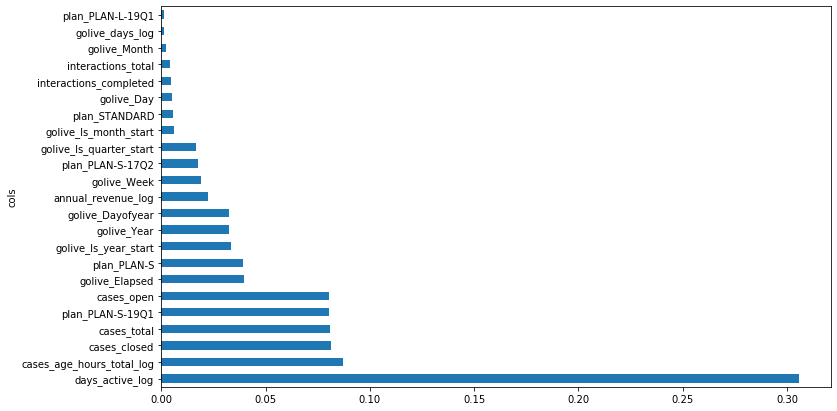

In [32]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [33]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [34]:
m = RandomForestClassifier(
    n_estimators=200,
    min_samples_leaf=2, 
    max_features='sqrt',
    n_jobs=-1, 
    #oob_score=True,
    max_depth=3,
    bootstrap=False,
    criterion='entropy',
    class_weight={0: 4, 1: 1}
    )

m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight={0: 4, 1: 1},
                       criterion='entropy', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

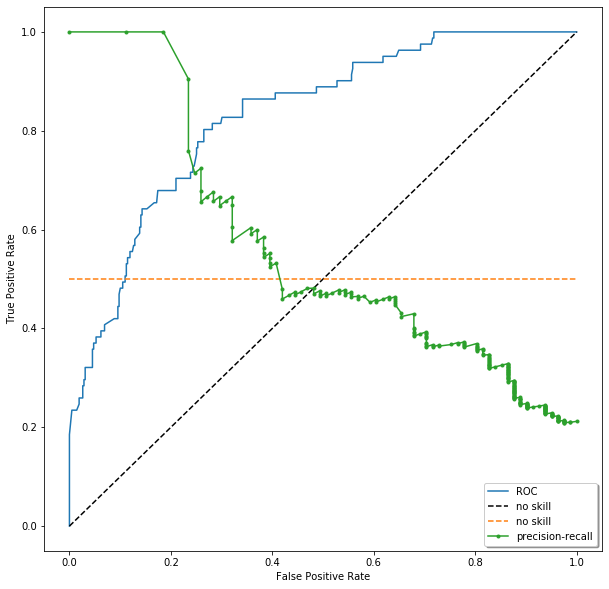

auc=0.566 ap=0.565


In [35]:
utils.plot_roc_pr(m, X_valid, y_valid)

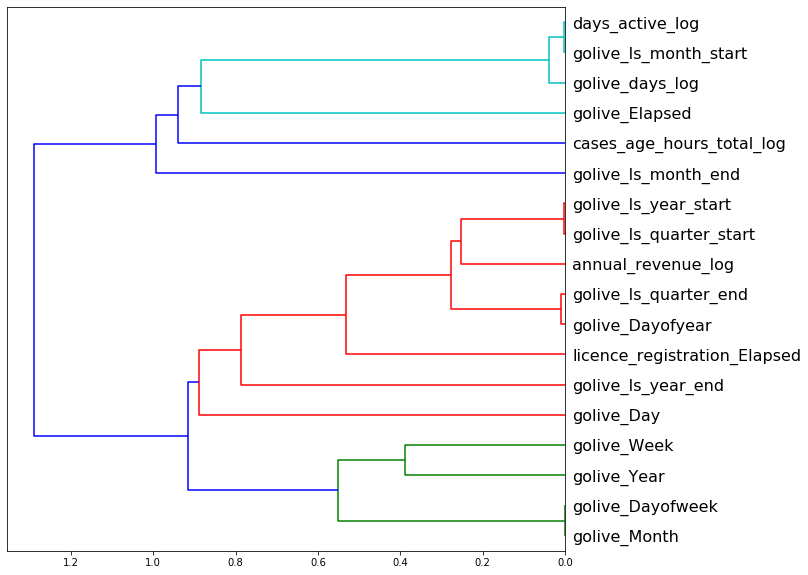

In [36]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=df_trn.columns, orientation='left', leaf_font_size=16)
plt.show()

In [37]:
print("precision, recall, f1_score, accuracy, cohen_kappa_score, mean abs error")

for column in df_keep.columns:
    m = RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=2, 
        max_features='sqrt',
        n_jobs=-1, 
        max_depth=3,
        bootstrap=False,
        criterion='entropy',
        class_weight={0: 4, 1: 1}
        )

    x, _ = split_vals(df_keep.drop(columns=[column]), n_trn)
    m.fit(x, y_train)
    y_pred = m.predict(x)
    print(column, utils.uber_score(y_train, y_pred))

precision, recall, f1_score, accuracy, cohen_kappa_score, mean abs error
0.9800347222222222 0.5143507972665148 0.67463400059755 0.7208408100487055 0.46893435443079434 0.2791591899512945
days_active_log None
1.0 0.6437357630979499 0.7832594235033259 0.7995385798513202 0.6124639819059019 0.20046142014867982
cases_age_hours_total_log None
0.999290780141844 0.6419134396355353 0.7816920943134534 0.7982568572160984 0.6100588007044145 0.20174314278390157
cases_closed None
1.0 0.6924829157175398 0.8183041722745625 0.8269674442450654 0.6632516626883214 0.17303255575493462
cases_total None
1.0 0.6296127562642369 0.7727145652781661 0.7915918995129454 0.5978756917961525 0.2084081004870546
plan_PLAN-S-19Q1 None
0.9919463087248322 0.6733485193621868 0.8021709633649933 0.8131248397846706 0.6369928332408954 0.1868751602153294
cases_open None
1.0 0.6296127562642369 0.7727145652781661 0.7915918995129454 0.5978756917961525 0.2084081004870546
golive_Elapsed None
1.0 0.6369020501138952 0.7781797940439743 0